# Built by Lubula Paul Chikwekwe

In [24]:
# Recurrent Neural Networks (RNNs) are a kind of neural network that specialize in processing sequences
# They’re often used in Natural Language Processing (NLP)
# RNNs are useful because they let us have variable-length sequences as both inputs and outputs.

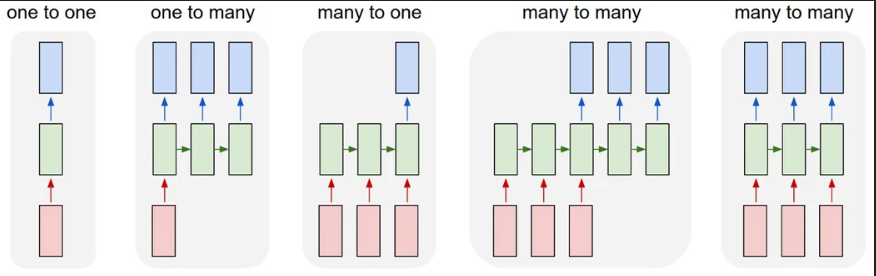

In [25]:
# process sequences makes RNNs very useful. For example:
# 1. Machine Translation (e.g. Google Translate) is done with “many to many” RNNs.
  # The original text sequence is fed into an RNN, which then produces translated text as output.
# 2. Sentiment Analysis (e.g. Is this a positive or negative review?) is often done with “many to one” RNNs.
  # The text to be analyzed is fed into an RNN, which then produces a single output classification (e.g. This is a positive review).

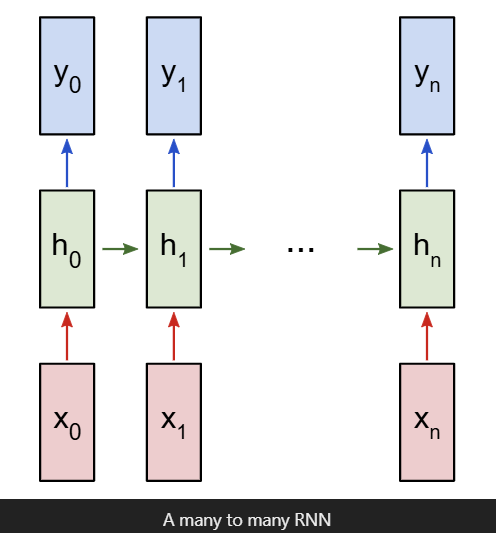

In [27]:
# 1.The next hidden state (ht) is calculated using the previous hidden state ht−1 and the next input xt.
# 2. The next output yt is calculated using ht.
# 3. Here’s what makes a RNN recurrent: it uses the same weights for each step

# Actual Problem Being Solved by RNN

In [28]:
# We’ll implement an RNN from scratch to perform a simple Sentiment Analysis task:
# determining whether a given text string is positive or negative.

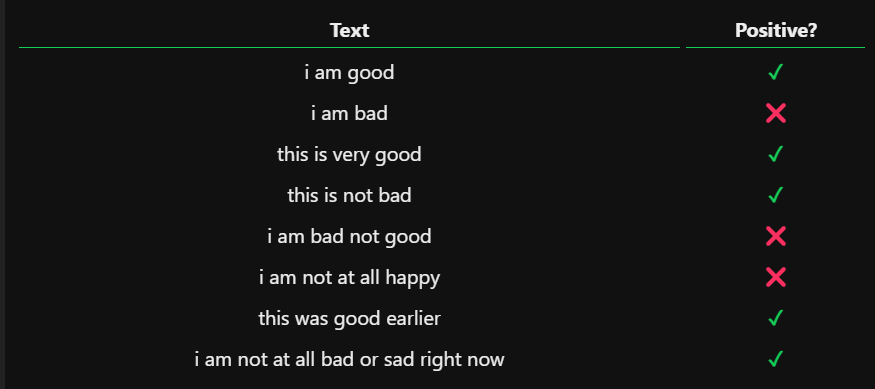

In [29]:
#  this is a classification problem!!!
# we’ll use a “many to one” RNN.
# This is similar to the “many to many” RNN we discussed earlier, but it only uses the final hidden state to produce the one output y:

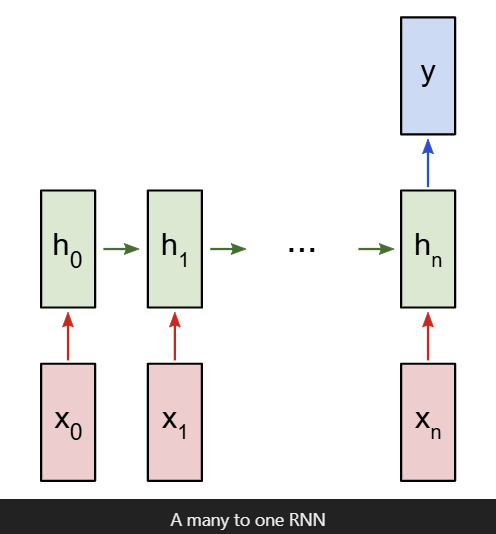

In [50]:
# Each xi will be a vector representing a word from the text.
# The output y will be a vector containing two numbers, one representing positive and the other negative.
# We’ll apply Softmax to turn those values into probabilities and ultimately decide between positive / negative.

In [49]:
# The dataset earlier consists of two Python dictionaries:
train_data = {
  'good': True,
  'bad': False,
  'happy': True,
  'sad': False,
  'not good': False,
  'not bad': True,
  'not happy': False,
  'not sad': True,
  'very good': True,
  'very bad': False,
  'very happy': True,
  'very sad': False,
  'i am happy': True,
  'this is good': True,
  'i am bad': False,
  'this is bad': False,
  'i am sad': False,
  'this is sad': False,
  'i am not happy': False,
  'this is not good': False,
  'i am not bad': True,
  'this is not sad': True,
  'i am very happy': True,
  'this is very good': True,
  'i am very bad': False,
  'this is very sad': False,
  'this is very happy': True,
  'i am good not bad': True,
  'this is good not bad': True,
  'i am bad not good': False,
  'i am good and happy': True,
  'this is not good and not happy': False,
  'i am not at all good': False,
  'i am not at all bad': True,
  'i am not at all happy': False,
  'this is not at all sad': True,
  'this is not at all happy': False,
  'i am good right now': True,
  'i am bad right now': False,
  'this is bad right now': False,
  'i am sad right now': False,
  'i was good earlier': True,
  'i was happy earlier': True,
  'i was bad earlier': False,
  'i was sad earlier': False,
  'i am very bad right now': False,
  'this is very good right now': True,
  'this is very sad right now': False,
  'this was bad earlier': False,
  'this was very good earlier': True,
  'this was very bad earlier': False,
  'this was very happy earlier': True,
  'this was very sad earlier': False,
  'i was good and not bad earlier': True,
  'i was not good and not happy earlier': False,
  'i am not at all bad or sad right now': True,
  'i am not at all good or happy right now': False,
  'this was not happy and not good earlier': False,
}

test_data = {
  'this is happy': True,
  'i am good': True,
  'this is not happy': False,
  'i am not good': False,
  'this is not bad': True,
  'i am not sad': True,
  'i am very good': True,
  'this is very bad': False,
  'i am very sad': False,
  'this is bad not good': False,
  'this is good and happy': True,
  'i am not good and not happy': False,
  'i am not at all sad': True,
  'this is not at all good': False,
  'this is not at all bad': True,
  'this is good right now': True,
  'this is sad right now': False,
  'this is very bad right now': False,
  'this was good earlier': True,
  'i was not happy and not good earlier': False,
}

In [51]:
# We’ll have to do some pre-processing to get the data into a usable format.
# To start, we’ll construct a vocabulary of all words that exist in our data:

In [52]:
# Create the vocabulary.
vocab = list(set([w for text in train_data.keys() for w in text.split(' ')]))
vocab_size = len(vocab)
print('%d unique words found' % vocab_size)

18 unique words found


In [53]:
# Assign indices to each word.
word_to_idx = { w: i for i, w in enumerate(vocab) }
idx_to_word = { i: w for i, w in enumerate(vocab) }
print(word_to_idx['good'])
print(idx_to_word[0])

2
at


In [54]:
import numpy as np

def createInputs(text):
  '''
  Returns an array of one-hot vectors representing the words
  in the input text string.
  - text is a string
  - Each one-hot vector has shape (vocab_size, 1)
  '''
  inputs = []
  for w in text.split(' '):
    v = np.zeros((vocab_size, 1))
    v[word_to_idx[w]] = 1
    inputs.append(v)
  return inputs

# We’ll use createInputs() later to create vector inputs to pass in to our RNN.

In [58]:
# initializing the 3 weights and 2 biases our RNN needs:
class RNN:
    # A Vanilla Recurrent Neural Network.
    def __init__(self, input_size, output_size, hidden_size=64):
        from numpy.random import randn
        # Weights
        self.Whh = randn(hidden_size, hidden_size) / 1000
        self.Wxh = randn(hidden_size, input_size) / 1000
        self.Why = randn(output_size, hidden_size) / 1000

        # Biases
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))

    def forward(self, inputs):
        '''
        Perform a forward pass of the RNN using the given inputs.
        Returns the final output and hidden state.
        - inputs is an array of one-hot vectors with shape (input_size, 1).
        '''
        h = np.zeros((self.Whh.shape[0], 1))

        # Perform each step of the RNN
        for i, x in enumerate(inputs):
            h = np.tanh(self.Wxh @ x + self.Whh @ h + self.bh)

        # Compute the output
        y = self.Why @ h + self.by
        return y, h


In [40]:
# We use np.random.randn() to initialize our weights from the standard normal distribution.

In [59]:
# Initialize our RNN
rnn = RNN(vocab_size, 2)

# Test input
inputs = createInputs('i am very good')
out, h = rnn.forward(inputs)

# Apply softmax
probs = softmax(out)
print(probs)

[[0.50000512]
 [0.49999488]]


In [68]:
# The RNN works!!! , but it’s not very useful yet (Accuracy issues)
# this is where back propagation comes in !!!